### 시각화 전략
 - 시각화의 목표
 - 시각화의 범위
 - 시각화의 개발절차
 
### 시각화 요구사항
 - 사용자 수준 / 취향
 - 시나리오 : 스토리보드 개발
 
### 데이터 시각화 명세서
 - 시각화 표현의 형태, 규칙, 패턴, 상호작용
 
### 시각화 명세서 기반 설계
 - 시각화 UI 설계

## 예시 : 2륜차 등록대수

### 시각화 전략
- 시각화의 목표 : 코로나와 배달 이륜차 등록대수 관계
- 시각화의 범위 : 부산광역시
- 시각화의 개발절차 : kosis.kr에서 데이터 확보, 분석 후 시각화

### 시각화 요구사항
- 사용자 수준 / 취향 : 배달 알바를 해야 하는가 고민중.
- 시나리오 / 스토리보드 개발 : 코로나 전에 비해 코로나 기간중 폭발적 증가세 보임. 코로나 이후 급격한 감소세. 이전보다는 많은것이 사실이나 많이 빠졌음.

### 데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용: 년도별 lineplot, 시기별 중형 이륜차 비율, 눈으로 크기 확인 용이할 경우 숫자 표시하지 않음.
 
### 시각화 명세서 기반 설계
- 시각화 UI 설계 : 상단 절반 년도별 lineplot, 하단 3등분하여 코로나 이전, 코로나 기간, 코로나 이후 크기별 비율 pie chart.

## 부산 기업체 수와 인구수

### 시각화 전략
- 시각화의 목표 : 부산에 위치한 기업체의 수와 부산인구수의 관계를 알아본다.
- 시각화 범위 : 부산의 실태조사를 위함이므로 부산에 한해서 조사
- 시각화 계발절차 : kosis에서 부산광역시사업체조사, 주민등록인구통계의 데이터를 확보 통합하여 시각화

### 시각화 요구사항
- 사용자 수준 / 취향 : 부산에서 안정적인 일자리를 찾을 수 있는가에 대한 고민.
- 시나리오 / 스토리보드 개발 : 부산의 청년인구는 꾸준한 감소세를 보임. 부산에 위치하는 기업체의 수를 연도별로 알아보고 그에 따른 인구수의 변화를 함께 시각화하여 자료로 만든다.

### 데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용: 년도별 인구수와 기업체의 수, 구.군별 인구수와 업체수의 증감

### 시각화 명세서 기반 설계
- 시각화 UI 설계 : 년도별 인구수와 기업체의 수 상관도 lineplot, 구.군별 인구와 기업체 증감 chart, 핵심 노동인력의 나이를 25~50세로 생각하고 해당 나이대에서의 변화를 chart

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

pd_data = pd.read_csv('산업대분류__읍·면·동별_사업체수__종사자수_20230313164622.csv',encoding='cp949')
pd_data = pd_data.drop(index=0)
pd_data = pd_data.drop('전체 산업', axis=1)
pd_data = pd_data.rename(columns={'읍·면·동별(1)': '구·군별'})
# pd_data.head()
pd_data.index -= 1
print(pd_data[:5])
print(pd_data.columns)

pd_data

     시점 구·군별 농업 임업 및 어업  광업    제조업 전기 가스 증기 및 공기조절 공급업 수도하수및폐기물처리원료재생업   건설업  \
0  2017   전체         79  18  31012                  49             431  8819   
1  2017   중구         21   1    685                   -               7   140   
2  2017   서구         23   3    498                   3              12   208   
3  2017   동구          5   1   1227                   2               9   384   
4  2017  영도구          3   -   1573                   2              20   266   

  도매 및 소매업 운수 및 창고업  ... 정보통신업 금융 및 보험업   부동산업 전문 과학 및 기술 서비스업  \
0    80645    27227  ...  1796     3301  11388            6825   
1     6082     2154  ...   104      209    370             344   
2     3616      739  ...    27       67    240             123   
3     4857     1156  ...    97      385    379             436   
4     2131     1097  ...    41       49    238             103   

  사업시설관리사업지원및임대서비스업 공공행정 국방 및 사회보장 행정 교육서비스업 보건업 및 사회복지 서비스업  \
0              5240               705  12282            91

,시점,구·군별,농업 임업 및 어업,광업,제조업,전기 가스 증기 및 공기조절 공급업,수도하수및폐기물처리원료재생업,건설업,도매 및 소매업,운수 및 창고업,...,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설관리사업지원및임대서비스업,공공행정 국방 및 사회보장 행정,교육서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련서비스업,협회 및 단체 수리 및 기타 개인서비스업
0,2017,전체,79,18,31012,49,431,8819,80645,27227,...,1796,3301,11388,6825,5240,705,12282,9147,7228,29027
1,2017,중구,21,1,685,-,7,140,6082,2154,...,104,209,370,344,422,37,176,221,330,1096
2,2017,서구,23,3,498,3,12,208,3616,739,...,27,67,240,123,181,33,339,289,174,1110
3,2017,동구,5,1,1227,2,9,384,4857,1156,...,97,385,379,436,448,48,259,361,172,1436
4,2017,영도구,3,-,1573,2,20,266,2131,1097,...,41,49,238,103,139,37,298,274,180,1072
5,2017,부산진구,2,-,2351,1,16,1077,10334,2550,...,220,805,1450,869,744,62,1403,1196,775,3442
6,2017,동래구,1,3,1039,3,11,894,5228,2171,...,76,176,911,376,388,34,1245,761,634,2365
7,2017,남구,-,-,975,3,18,517,3689,2116,...,153,147,675,313,308,51,871,626,485,2018
8,2017,북구,-,1,617,1,16,399,3572,2308,...,53,149,684,171,185,43,981,706,592,1801
9,2017,해운대구,-,2,856,5,27,811,7622,2657,...,512,278,1579,1077,511,66,1752,1057,766,2846


In [24]:
pd_data2 =  pd.read_csv('부산광역시_전체_세대_및_인구개황_20230313164634.csv',encoding='cp949')
pd_data2.head()
pd_data2['구·군별'].replace('부산광역시', '전체', inplace=True)
print(pd_data2[:5])
print(pd_data2.columns)

pd_data2

     시점 구·군별  인구수  (명)
0  2017   전체   3520306
1  2017   중구     46066
2  2017   서구    111945
3  2017   동구     90856
4  2017  영도구    125347
Index(['시점', '구·군별', '인구수  (명)'], dtype='object')


,시점,구·군별,인구수 (명)
0,2017,전체,3520306
1,2017,중구,46066
2,2017,서구,111945
3,2017,동구,90856
4,2017,영도구,125347
5,2017,부산진구,374504
6,2017,동래구,271967
7,2017,남구,279309
8,2017,북구,305045
9,2017,해운대구,417161


In [43]:
merged_data = pd.concat([pd_data, pd_data2['인구수  (명)']], axis=1)
# print(merged_data[:5])
print(merged_data.columns)
merged_data[0:, 1]

Index(['시점', '구·군별', '농업 임업 및 어업', '광업', '제조업', '전기 가스 증기 및 공기조절 공급업',
       '수도하수및폐기물처리원료재생업', '건설업', '도매 및 소매업', '운수 및 창고업', '숙박 및 음식점업', '정보통신업',
       '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업', '사업시설관리사업지원및임대서비스업',
       '공공행정 국방 및 사회보장 행정', '교육서비스업', '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련서비스업',
       '협회 및 단체 수리 및 기타 개인서비스업', '인구수  (명)'],
      dtype='object')


InvalidIndexError: (slice(0, None, None), 1)

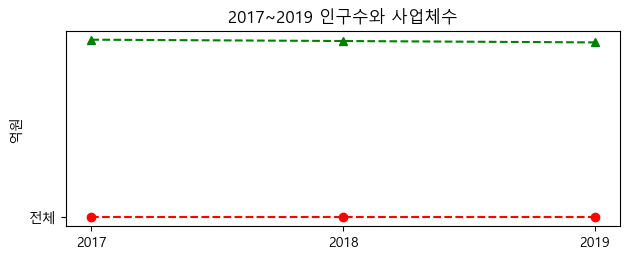

In [29]:
filter1= merged_data['구·군별']=='전체'
x = merged_data.loc[filter1,'시점']
col_names = merged_data.columns
fig = plt.figure(layout='tight')
line_axe = fig.add_subplot(2,1,1)
line_axe.set(title='2017~2019 인구수와 사업체수',ylabel = '억원')

line_axe.plot(x,merged_data.loc[filter1,'구·군별'],'ro--',x,merged_data.loc[filter1,'인구수  (명)'],'g^--')